In [2]:
cd /home/dongdong/SCR/msm_numa/micro500_lag150_tica4lag80

/scratch/gpfs/dongdong/msm_numa/micro500_lag150_tica4lag80


In [1]:
from msmbuilder.dataset import dataset
from msmbuilder.cluster import KCenters
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.cluster import MiniBatchKMedoids
from msmbuilder.msm import MarkovStateModel
from msmbuilder.lumping import PCCAPlus
from msmbuilder.lumping import PCCA
from msmbuilder.msm import implied_timescales
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=20)

/home/dongdong/software/anaconda3/envs/py3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
xyz = dataset("/home/disk2/wdd/NUMA/MSM/*.xtc",topology='/home/disk2/wdd/NUMA/MSM/cluster_1.pdb',stride=10)

In [6]:
from msmbuilder.featurizer import DihedralFeaturizer
featurizer = DihedralFeaturizer(types=['phi', 'psi'])
diheds = xyz.fit_transform_with(featurizer, 'diheds/', fmt='dir-npy')
from msmbuilder.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_diheds = diheds.fit_transform_with(scaler, 'scaled_diheds/', fmt='dir-npy')

In [67]:
from msmbuilder.decomposition import tICA
tica_model = tICA(lag_time=80, n_components=4,kinetic_mapping=True)
# fit and transform can be done in seperate steps:
tica_model = scaled_diheds.fit_with(tica_model)
tica_trajs = scaled_diheds.transform_with(tica_model, 'ticas/', fmt='dir-npy')
clusterer = MiniBatchKMedoids(n_clusters=500, random_state=42)

In [4]:
from msmbuilder.io import save_meta,load_meta

In [5]:
clustered_trajs = load_meta('clustered_trajs.pickl')

In [8]:
lag_times = np.arange(1,200,10)
n_timescales = 20
msm_timescales = implied_timescales(clustered_trajs, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False), n_jobs = 5)

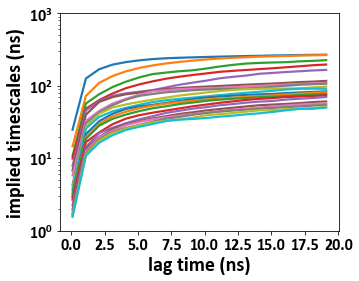

In [12]:
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
for i in range(n_timescales):
    plt.plot(lag_times*0.1, msm_timescales[:,i]*0.1,lw=2.2)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'lag time (ns)',fontproperties=font_prop)
plt.ylabel(r'implied timescales (ns)',fontproperties=font_prop)
#plt.xlim(-1,21)
plt.ylim(1,1000)
plt.semilogy()
plt.savefig('impliedtimescales_tica4_lag80_kmedoids500_dihed.png',dpi=600,bbox_inches='tight')
plt.show()

In [133]:
msm=MarkovStateModel(lag_time=150,reversible_type='mle', ergodic_cutoff='off',verbose=False)
msm.fit(clustered_trajs)
lab_fix=msm.transform(clustered_trajs,mode='fill')

In [13]:
cd macro28/

/scratch/gpfs/dongdong/msm_numa/micro500_lag150_tica4lag80/macro28


In [14]:
macro_clustered_trajs = load_meta('macro_trajs.pickl')

In [15]:
lag_times = np.arange(1,200,10)
n_timescales = 20
msm_timescales = implied_timescales(macro_clustered_trajs, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(verbose=False), n_jobs = 5)

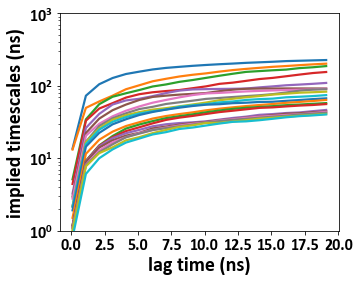

In [16]:
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
for i in range(n_timescales):
    plt.plot(lag_times*0.1, msm_timescales[:,i]*0.1,lw=2.2)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'lag time (ns)',fontproperties=font_prop)
plt.ylabel(r'implied timescales (ns)',fontproperties=font_prop)
#plt.xlim(-1,21)
plt.ylim(1,1000)
plt.semilogy()
plt.savefig('impliedtimescales_macro28.png',dpi=600,bbox_inches='tight')
plt.show()

In [17]:
cd temp/

/scratch/gpfs/dongdong/msm_numa/micro500_lag150_tica4lag80/macro28/temp


In [22]:
import mdtraj as md
import os
for i in range(28):
    trjname=str(i)+'_sample.xtc'
    trj=md.load(trjname, top='cluster_1.pdb')
    j=0
    for tt in trj:
        pdbname=str(i)+'/'+str(i)+'_'+str(j)+'.pdb'
        tt.save_pdb(pdbname)
        j+=1

In [35]:
import random
import os
population=np.loadtxt('../Populations.dat')
total_num=1000
for i in range(len(population)):
    num=int(round(total_num*population[i]))
    if num>0:
        for j in random.sample(range(0,total_num),num):
            name=str(i)+'/'+str(i)+'_'+str(j)+'.pdb'
            os.system('cp %s ensemble2/' %name)

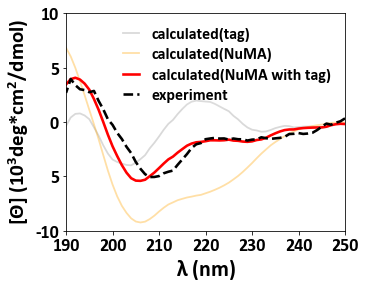

In [111]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=22)
yl_prop = font_manager.FontProperties(fname=font_path, size=21)
leg_prop = font_manager.FontProperties(fname=font_path, size=16)
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
cddata=np.loadtxt('/home/dongdong/SCR/software/SESCA_v093/numa4/Compare_CD_auto_HBSS-3SC1.out')
cddata2=np.loadtxt('/home/dongdong/SCR/software/SESCA_v093/numa4/Compare_CD_auto_HBSS-3SC1_prot.out')
cddata3=np.loadtxt('/home/dongdong/SCR/software/SESCA_v093/numa4/Compare_CD_auto_HBSS-3SC1_tag.out')
plt.plot(cddata3[:,0],cddata3[:,2],lw=1.8,label='calculated(tag)',color='black',alpha=0.15)
plt.plot(cddata2[:,0],cddata2[:,2]*0.6,lw=1.8,label='calculated(NuMA)',color='orange',alpha=0.35)
plt.plot(cddata[:,0],cddata[:,2],lw=2.6,label='calculated(NuMA with tag)',color='red')
plt.plot(cddata[:,0], cddata[:,1],'--',lw=2.6,label='experiment',color='black')
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(18)
sub.set_yticks(np.linspace(-10,10,5))
sub.set_yticklabels([-10,5,0,5,10])
plt.xlabel(r'$\mathregular{\lambda}$ (nm)',fontproperties=font_prop)
plt.ylabel(r'[$\mathregular{\Theta}$] ($\mathregular{10^3}$deg*$\mathregular{cm^2}$/dmol)',fontproperties=yl_prop)
plt.ylim(-10,10)
plt.xlim(190,250)
leg=sub.legend(loc=1, labelspacing=0.37, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
#plt.semilogy()
plt.savefig('CD_all.png',dpi=600,bbox_inches='tight')
plt.show()

In [101]:
pwd

'/scratch/gpfs/dongdong/msm_numa/micro500_lag150_tica4lag80/macro28/temp'

In [136]:
wf=open('Populations.dat','w')
for h in msm.populations_:
    wf.write(str(h)+'\n')
wf.close()

matrix = msm.transmat_
wf=open('matrix.dat','w')
for h in matrix:
    for l in h:
        wf.write(str(l)+'    ')
    wf.write('\n')
wf.close()

In [137]:
cp -r ../kmedoids/ ./

In [138]:
import mdtraj.io as mdio
from msmbuilder.io import save_meta,load_meta
save_meta(clustered_trajs,'clustered_trajs.pickl')
save_meta(msm,'msm.pickl')

In [141]:
nMacrostates = 28
lagT = 150
pcca = PCCAPlus.from_msm(msm, n_macrostates=nMacrostates)
macro_trajs = pcca.transform(lab_fix)

Optimization terminated successfully.
         Current function value: -20.842407
         Iterations: 29
         Function evaluations: 4412


In [1]:
lag_times = np.arange(1,200,10)
n_timescales = 20
msm_timescales = implied_timescales(macro_trajs, lag_times, n_timescales=n_timescales, msm=MarkovStateModel(reversible_type='mle',ergodic_cutoff='on',verbose=False), n_jobs = 4)
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(1,1,1)
for i in range(n_timescales):
    plt.plot(lag_times*0.1, msm_timescales[:,i]*0.1,lw=2.2)
for label in (sub.get_xticklabels() + sub.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.xlabel(r'lag time (ns)',fontproperties=font_prop)
plt.ylabel(r'implied timescales (ns)',fontproperties=font_prop)
plt.xlim(-1,50)
plt.ylim(1,1000)
plt.semilogy()
plt.savefig('Macro28_impliedtimescales_lag150-.png',dpi=600,bbox_inches='tight')
plt.show()

NameError: name 'np' is not defined

In [153]:
Macromsm = MarkovStateModel(lag_time=150,ergodic_cutoff='off',reversible_type=None)
Macromsm.fit(macro_trajs)

MarkovStateModel(ergodic_cutoff='off', lag_time=150, n_timescales=None,
         prior_counts=0, reversible_type=None, sliding_window=True,
         verbose=True)

In [154]:
cd /home/disk2/wdd/NUMA/MSM4/micro500_lag150_tica4lag80/macro28

/home/disk2/wdd/NUMA/MSM4/micro500_lag150_tica4lag80/macro28


In [155]:
wf=open('Populations.dat','w')
for h in Macromsm.populations_:
    wf.write(str(float(h))+'\n')
wf.close()
from msmbuilder.tpt import mfpts
Macro_mfpt = mfpts(Macromsm)
wf=open('Macro_mfpt.dat','w')
for h in Macro_mfpt:
    for l in h:
        wf.write(str(l)+'    ')
    wf.write('\n')
wf.close()
wf=open('tProb.mtx','w')
wf.write('%%MatrixMarket matrix coordinate real general\n%\n')
wf.write(str(len(Macromsm.transmat_))+' '+str(len(Macromsm.transmat_[0]))+' '+str(len(Macromsm.transmat_)*len(Macromsm.transmat_[0]))+'\n')
for i in range(len(Macromsm.transmat_)):
    for j in range(len(Macromsm.transmat_[i])):
        wf.write(str(i+1)+' '+str(j+1)+' '+str(Macromsm.transmat_[i][j])+'\n')
wf.close()

/home/disk2/software/anaconda2/envs/msmb/lib/python2.7/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [156]:
save_meta(Macromsm,'Macromsm.pickl')

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/io/io.py:54: BackupWarning: Macromsm.pickl exists. Moving it to Macromsm.pickl.bak.1
  BackupWarning)


In [157]:
save_meta(macro_trajs,'macro_trajs.pickl')

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/msmbuilder-3.8.0-py2.7-linux-x86_64.egg/msmbuilder/io/io.py:54: BackupWarning: macro_trajs.pickl exists. Moving it to macro_trajs.pickl.bak.1
  BackupWarning)


In [158]:
from msmbuilder.tpt import hub_scores
hubscore=hub_scores(Macromsm)

In [159]:
hubscore

array([ 0.00632822,  0.06609448,  0.09814265,  0.03409228,  0.12857536,
        0.23197056,  0.33714793,  0.1389349 ,  0.1183545 ,  0.20880616,
        0.34409505,  0.20391314,  0.20822565,  0.38826714,  0.30015264,
        0.20981366,  0.3446445 ,  0.48361841,  0.57824732,  0.31210015,
        0.34576385,  0.38295126,  0.40797966,  0.40631324,  0.5713685 ,
        0.66346658,  0.9298236 ,  0.88828235])

In [160]:
wf=open('Macro28_hubScores.dat','w')
for h in hubscore:
    wf.write(str(h)+'\n')
wf.close()

In [152]:
wf=open('xtc_sortname.cs','w')
for i in range(len(xyz)):
    wf.write(str(xyz.filename(i))+'\n')
wf.close()

In [162]:
/home/disk2/wdd/glpf/msm/CKtestV5 -msm Macromsm.pickl -clu macro_trajs.pickl -dt 10 -T 6
./extract_sample -m Macromsm.pickl -i '/home/disk2/wdd/NUMA/MSM' -t /home/disk2/wdd/NUMA/MSM/cluster_1.pdb -s xtc_sortname.cs -n 1000 -T 5

SyntaxError: invalid syntax (<ipython-input-162-10ee96d7e90f>, line 1)

In [163]:
from MDAnalysis import Universe
import MDAnalysis.analysis.encore as encore

In [165]:
cd temp

/home/disk2/wdd/NUMA/MSM4/micro500_lag150_tica4lag80/macro28/temp


In [223]:
ens0 = Universe('cluster_1.pdb', '0_sample.xtc')

In [224]:
ens1 = Universe('cluster_1.pdb', '1_sample.xtc')

In [225]:
ens2 = Universe('cluster_1.pdb', '2_sample.xtc')

In [170]:
ens27 = Universe('cluster_1.pdb', '27_sample.xtc')

In [175]:
ens_remd = Universe('cluster_1.pdb', 'remd_chainB_skip10_begin60ns.xtc')

In [180]:
print encore.hes([ens0, ens_remd],align=True)

(array([[    0.        ,  2956.25994492],
       [ 2956.25994492,     0.        ]]), None)


In [186]:
print encore.hes([ens27, ens_remd],align=True)[0]

[[  0.          94.92124703]
 [ 94.92124703   0.        ]]


In [182]:
ens26 = Universe('cluster_1.pdb', '26_sample.xtc')

In [183]:
print encore.hes([ens26, ens_remd],align=True)

(array([[  0.        ,  93.49452833],
       [ 93.49452833,   0.        ]]), None)


In [184]:
print encore.hes([ens1, ens_remd],align=True)

(array([[    0.       ,  2956.2270132],
       [ 2956.2270132,     0.       ]]), None)


In [187]:
print encore.hes([ens0,ens1,ens2, ens_remd],align=True)

(array([[  0.00000000e+00,  -2.89213098e-14,   2.41590196e+03,
          2.95619193e+03],
       [ -2.89213098e-14,   0.00000000e+00,   2.41590196e+03,
          2.95619193e+03],
       [  2.41590196e+03,   2.41590196e+03,   0.00000000e+00,
          7.04751210e+02],
       [  2.95619193e+03,   2.95619193e+03,   7.04751210e+02,
          0.00000000e+00]]), None)


In [190]:
ens_remd = Universe('cluster_1.pdb', 'remd_chainB_skip10_begin60ns.xtc')
ensname=[]
rmsdname=[]
for i in range(28):
    ensname.append('ens'+str(i))
    rmsdname.append('rmsd_matrix'+str(i))  
for i in range(28):
    trjname=str(i)+'_sample.xtc'
    ensname[i] = Universe('cluster_1.pdb', trjname)
    rmsdname[i] = encore.get_distance_matrix(encore.utils.merge_universes([ensname[i], ens_remd]), save_matrix="rmsd"+str(i)+".npz")


In [201]:
CES0,details0 = encore.ces([ensname[0], ens_remd],distance_matrix = rmsdname[0])

In [206]:
CES0[0][1]

0.69314718055994529

In [233]:
ens_remd = Universe('cluster_1.pdb', 'remd_chainB_skip10_begin60ns.xtc')
wf=open('dres_score.cs','w')
for i in range(28):
    print i
    trjname=str(i)+'_sample.xtc'
    ensname=Universe('cluster_1.pdb', trjname)
    CES,details = encore.dres([ensname, ens_remd])
    print CES
    wf.write(str(i)+'    '+str(CES[0][1])+'\n')
wf.close()

0
[[ 0.          0.62867828]
 [ 0.62867828  0.        ]]
1
[[ 0.          0.46401349]
 [ 0.46401349  0.        ]]
2
[[ 0.          0.36281964]
 [ 0.36281964  0.        ]]
3
[[ 0.          0.50659778]
 [ 0.50659778  0.        ]]
4
[[ 0.          0.05471038]
 [ 0.05471038  0.        ]]
5
[[ 0.          0.36810568]
 [ 0.36810568  0.        ]]
6
[[ 0.          0.19661121]
 [ 0.19661121  0.        ]]
7
[[ 0.          0.44130187]
 [ 0.44130187  0.        ]]
8
[[ 0.          0.07574808]
 [ 0.07574808  0.        ]]
9
[[ 0.          0.21189897]
 [ 0.21189897  0.        ]]
10
[[ 0.          0.08258159]
 [ 0.08258159  0.        ]]
11
[[ 0.          0.26178808]
 [ 0.26178808  0.        ]]
12
[[ 0.          0.41025985]
 [ 0.41025985  0.        ]]
13
[[ 0.          0.14687792]
 [ 0.14687792  0.        ]]
14
[[ 0.          0.16752937]
 [ 0.16752937  0.        ]]
15
[[ 0.          0.07524109]
 [ 0.07524109  0.        ]]
16
[[ 0.          0.08129356]
 [ 0.08129356  0.        ]]
17
[[ 0.          0.0797

In [212]:
CES1,details1 = encore.ces([ens1, ens_remd])

In [220]:
encore.hes([ens27, ens_remd],align=True)

(array([[  0.        ,  94.93108594],
        [ 94.93108594,   0.        ]]), None)

In [218]:
CES27,details27 = encore.ces([ens27, ens_remd])

In [219]:
CES27[0][1]

0.69314718055994529

In [221]:
DRES27,details27 = encore.dres([ens27, ens_remd])

In [222]:
DRES27

array([[ 0.       ,  0.1347643],
       [ 0.1347643,  0.       ]])

In [226]:
DRES0,details0 = encore.dres([ens0, ens_remd])

In [227]:
DRES0

array([[ 0.        ,  0.64324492],
       [ 0.64324492,  0.        ]])

In [231]:
ens27.trajectory

<MemoryReader with 1000 frames of 450 atoms>